In [1]:
NAME = "Jaspreet Kaur"

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn import metrics # for the check the error and accuracy of the model
import os
import datetime as dt

In [4]:
# Use pandas read_csv() function to read the Dataset
df = pd.read_csv("heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Use of shape to show the number of rows and columns in the dataset 
df.shape

(299, 13)

In [6]:
# Look at the data types to see which columns need to be encoded.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.sample(10, random_state=0)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
206,40.000,1,101,0,40,0,226000.00,0.8,141,0,0,187,0
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0
12,45.000,1,981,0,30,0,136000.00,1.1,137,1,0,11,1
219,55.000,0,582,1,35,1,371000.00,0.7,140,0,0,197,0
237,70.000,0,232,0,30,0,173000.00,1.2,132,1,0,210,0
136,65.000,1,59,1,60,0,172000.00,0.9,137,0,0,107,0
228,65.000,0,56,0,25,0,237000.00,5.0,130,0,0,207,0
205,50.000,1,167,1,45,0,362000.00,1.0,136,0,0,187,0
52,60.000,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
108,63.000,0,936,0,38,0,304000.00,1.1,133,1,1,88,0


In [8]:
# Use of descibe() function to show the min, max, mean and standard deviation of the numeric variables
pd.set_option("display.float", "{:.2f}".format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


In [9]:
# The frequency of deaths
yes = df.DEATH_EVENT.sum()
no = len(df) - yes
print(yes)
print(no)

96
203


In [10]:
# Calculating the percentage
yes_perc = round(yes/ len(df) * 100, 1)
no_perc = round(no/ len(df)* 100, 1)
print(yes_perc)
print(no_perc)

32.1
67.9


Text(0.5, 1.0, 'Count of Deaths rates')

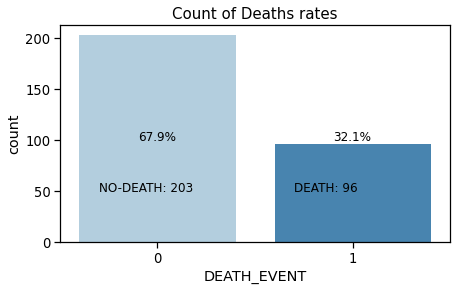

In [11]:
import sys
import seaborn as sns
plt.figure(figsize = (7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('DEATH_EVENT', data = df, palette = "Blues")
plt.annotate('NO-DEATH: {}'.format(no), xy = (-0.3, 100), xytext = (-0.3 , 50), size = 12)
plt.annotate('DEATH: {}'.format(yes), xy = (0.7, 100), xytext = (0.7 , 50), size = 12)
plt.annotate(str(no_perc) + "%", xy = (-0.3, 100), xytext = (-0.1 , 100), size = 12)
plt.annotate(str(yes_perc) + "%", xy = (0.7, 100), xytext = (0.9 , 100), size = 12)
plt.title("Count of Deaths rates", size = 15)


In [12]:

discrete_vars = ["anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction","high_blood_pressure","serum_sodium","sex","smoking"]
continuous_vars = ['age', 'platelets', 'serum_creatinine', 'time', 'DEATH_EVENT' ]

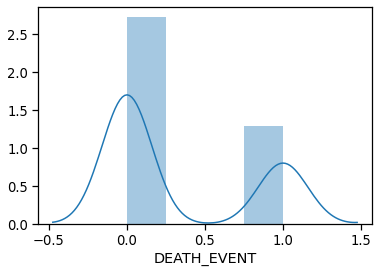

In [13]:
sns.distplot(df['DEATH_EVENT'])

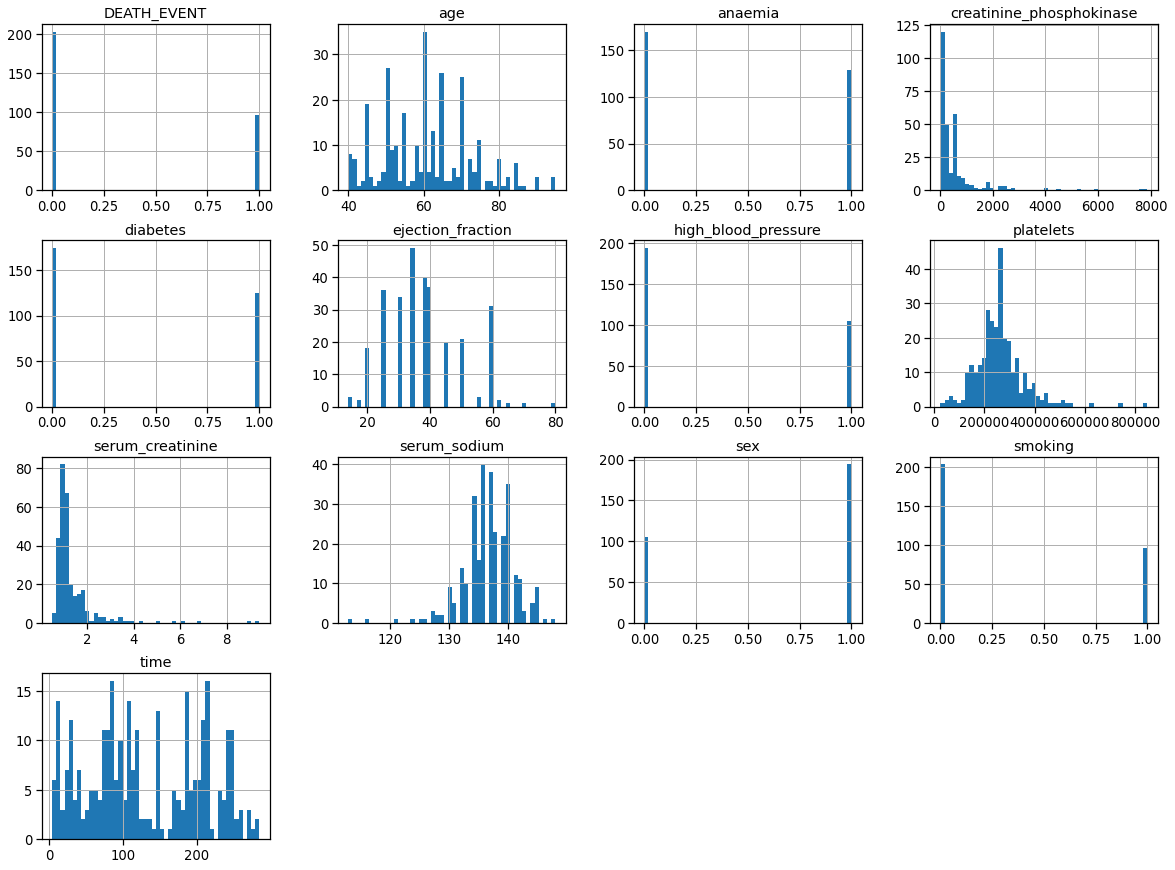

In [14]:
# we use the .hist() pandas function here for the more compact view
# we can accomplish the same with plt.subplots, sns.distplot() and a few extra lines of code
df.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()


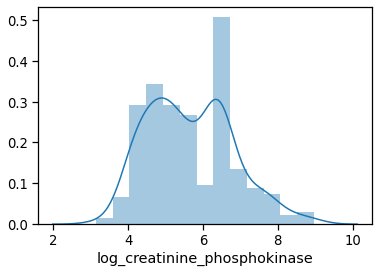

In [15]:
#Log Transform can be easily done via Numpy, just by calling the log() function on the desired column. 
df['log_creatinine_phosphokinase'] = df['creatinine_phosphokinase'].apply(np.log)
sns.distplot(df['log_creatinine_phosphokinase'])
plt.show()
discrete_vars[1] = 'log_creatinine_phosphokinase'

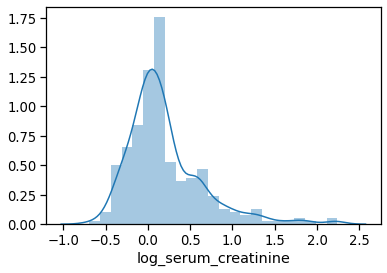

In [16]:
df['log_serum_creatinine'] = np.log(df['serum_creatinine'])
sns.distplot(df['log_serum_creatinine'])
plt.show()
continuous_vars[2]= 'log_serum_creatinine'

In [17]:
df = df.loc[:, discrete_vars + continuous_vars]
df.head()

,anaemia,log_creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,age,platelets,log_serum_creatinine,time,DEATH_EVENT
0,0,6.37,0,20,1,130,1,0,75.00,265000.00,0.64,4,1
1,0,8.97,0,38,0,136,1,0,55.00,263358.03,0.10,6,1
2,0,4.98,0,20,0,129,1,1,65.00,162000.00,0.26,7,1
3,1,4.71,0,20,0,137,1,0,50.00,210000.00,0.64,7,1
4,1,5.08,1,20,0,116,0,0,65.00,327000.00,0.99,8,1


In [18]:
# Numerical - impute, scale
sc = MinMaxScaler()
df['platelets'] = sc.fit_transform(df[['platelets']].values)[:, 0]

In [19]:
df

,anaemia,log_creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,age,platelets,log_serum_creatinine,time,DEATH_EVENT
0,0,6.37,0,20,1,130,1,0,75.00,0.29,0.64,4,1
1,0,8.97,0,38,0,136,1,0,55.00,0.29,0.10,6,1
2,0,4.98,0,20,0,129,1,1,65.00,0.17,0.26,7,1
3,1,4.71,0,20,0,137,1,0,50.00,0.22,0.64,7,1
4,1,5.08,1,20,0,116,0,0,65.00,0.37,0.99,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,4.11,1,38,1,143,1,1,62.00,0.16,0.10,270,0
295,0,7.51,0,38,0,139,0,0,55.00,0.30,0.18,271,0
296,0,7.63,1,60,0,138,0,0,45.00,0.87,-0.22,278,0
297,0,7.79,0,38,0,140,1,1,45.00,0.14,0.34,280,0


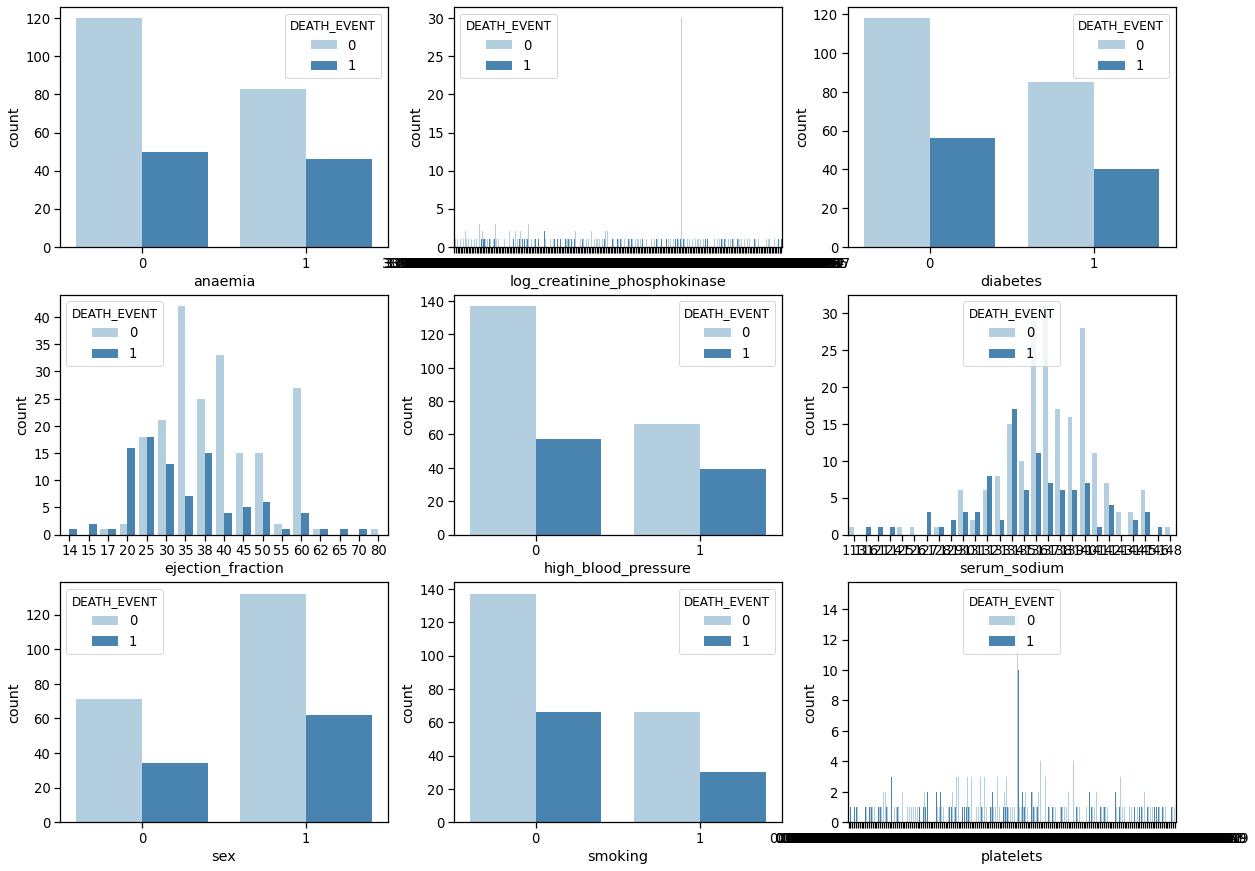

In [20]:
# creating a dataframe with categorical variables
cat_vari = df[["anaemia", "log_creatinine_phosphokinase", "diabetes", "ejection_fraction","high_blood_pressure","serum_sodium","sex","smoking",'platelets','DEATH_EVENT']]
f, axes = plt.subplots(3,3, figsize = (20,15), facecolor = 'white')
ax1 = sns.countplot(x = 'anaemia', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[0,0])
ax2 = sns.countplot(x = 'log_creatinine_phosphokinase', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[0,1])
ax3 = sns.countplot(x = 'diabetes', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[0,2])
ax4 = sns.countplot(x = 'ejection_fraction', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[1,0])
ax5 = sns.countplot(x = 'high_blood_pressure', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[1,1])
ax6 = sns.countplot(x = 'serum_sodium', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[1,2])
ax7 = sns.countplot(x = 'sex', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[2,0])
ax8 = sns.countplot(x = 'smoking', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[2,1])
ax9 = sns.countplot(x = 'platelets', hue = 'DEATH_EVENT', data = cat_vari, palette = 'Blues', ax = axes[2,2])


# Correlation Analysis

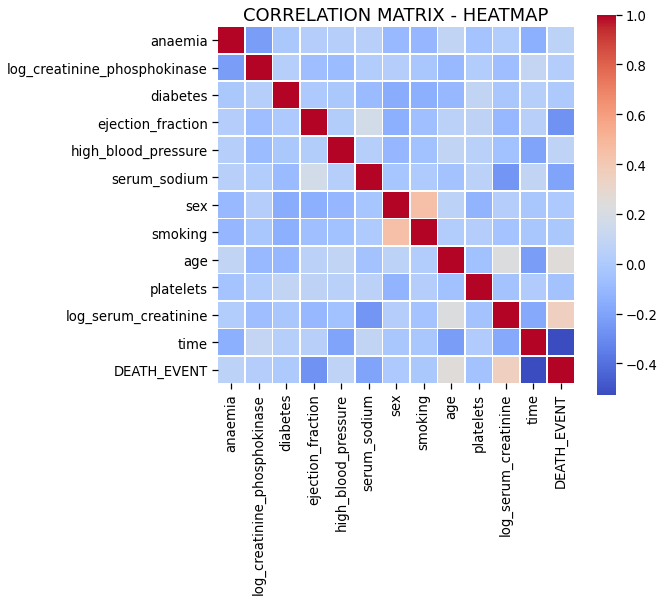

In [21]:
# corr = df.corr() # .corr is used to find corelation
corr= df.iloc[:, 0: ].corr(method='pearson')
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [22]:
# Original dataset
X = df.drop('DEATH_EVENT', axis=1)  
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 12)
(60, 12)
(239,)
(60,)


# Logistic Regression

In [24]:
# Logistic Regression using sklearn's LogisticRegression()
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( n_jobs =-1, random_state = 15)
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=15)

Accuracy: 0.7833333333333333

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60




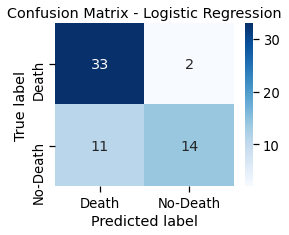

In [25]:
y_pred_reg =log_reg.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_reg,y_test))

print()
print(classification_report(y_test, y_pred_reg))
print()

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,log_reg.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Death', 'No-Death'], 
            yticklabels = ['Death', 'No-Death'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

# KNN

In [26]:
#Default KNN model without any tuning - base metric
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_KNN =KNN.predict(X_test)


Accuracy: 0.7333333333333333

              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60




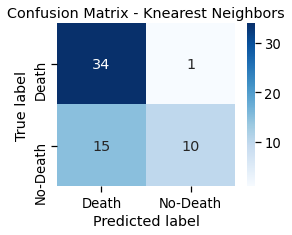

In [27]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=150,
                     weights='distance')
knn.fit(X_train, y_train)
y_pred_KNN =knn.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_KNN,y_test))

print()
print(classification_report(y_test, y_pred_KNN))
print()

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Death', 'No-Death'], 
            yticklabels = ['Death', 'No-Death'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Knearest Neighbors");

In [28]:
y_pred_proba_KNN = knn.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_KNN)

In [29]:
y_pred_proba_log = log_reg.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_log)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_log)


Text(0.5, 1.0, 'ROC')

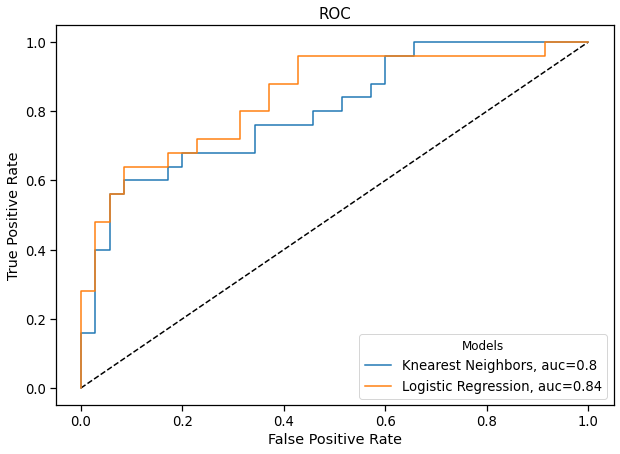

In [30]:
# Comparision between KNN and Logistic regression by using ROC curve. 
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Knearest Neighbors, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Logistic Regression, auc="+str(round(auc2,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)